In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

from logitlens import LogitLens
import pandas as pd
import matplotlib.pyplot as plt
import ast

In [ ]:
MODEL_NAME = "Tower-Babel/Babel-9B-Chat"
LANGUAGE = "English"
logit_lens = LogitLens(LANGUAGE, MODEL_NAME)
MODEL_NAME = MODEL_NAME.split("/")[-1]
layers_original, rates_original, layers_typo, rates_typo = logit_lens.run(
    path1 = f"/home/hyujang/multilingual-inner-lexicon/data/RQ1/WordIdentity/single_token_splitted_{MODEL_NAME}_{LANGUAGE}_v2.csv",
    path2 = f"/home/hyujang/multilingual-inner-lexicon/data/RQ1/WordIdentity/single_token_typos_{MODEL_NAME}_{LANGUAGE}_v2.csv",
    vis=True,
    save=True
)

Using device: cuda


Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

Using device: cuda


Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

Model Tower-Babel/Babel-9B-Chat for German loaded successfully.


100%|██████████| 700/700 [01:04<00:00, 10.89it/s]


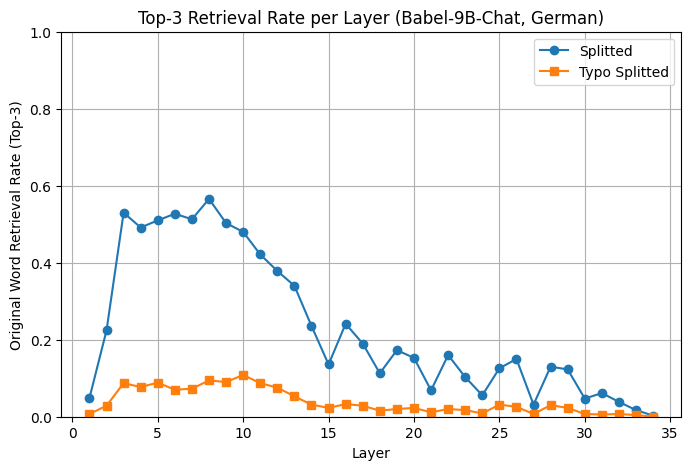

In [5]:
MODEL_NAME = "Tower-Babel/Babel-9B-Chat"
LANGUAGE = "German"
logit_lens = LogitLens(LANGUAGE, MODEL_NAME)
MODEL_NAME = MODEL_NAME.split("/")[-1]
layers_original, rates_original, layers_typo, rates_typo = logit_lens.run(
    path1 = f"/home/hyujang/multilingual-inner-lexicon/data/RQ1/WordIdentity/single_token_splitted_{MODEL_NAME}_{LANGUAGE}_v2.csv",
    path2 = f"/home/hyujang/multilingual-inner-lexicon/data/RQ1/WordIdentity/single_token_typos_{MODEL_NAME}_{LANGUAGE}_v2.csv",
    vis=True,
    save=True
)

Using device: cuda


Loading checkpoint shards:   0%|          | 0/5 [00:00<?, ?it/s]

Model google/gemma-3-12b-it for English loaded successfully.


100%|██████████| 700/700 [02:44<00:00,  4.25it/s]


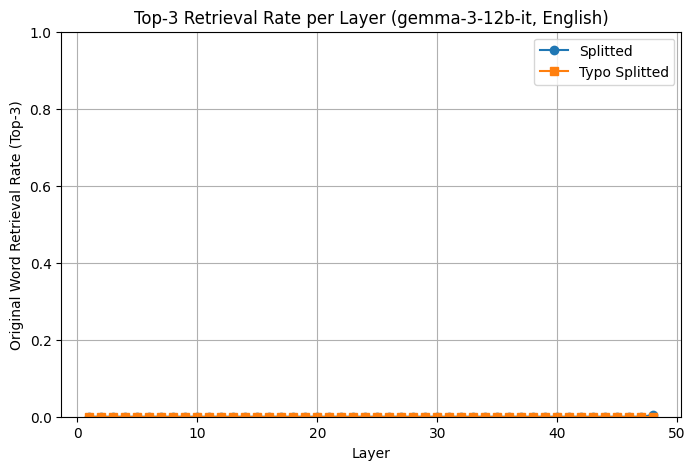

In [2]:
MODEL_NAME = "google/gemma-3-12b-it"
LANGUAGE = "English"
logit_lens = LogitLens(LANGUAGE, MODEL_NAME)
MODEL_NAME = MODEL_NAME.split("/")[-1]
layers_original, rates_original, layers_typo, rates_typo = logit_lens.run(
    path1 = f"/home/hyujang/multilingual-inner-lexicon/data/RQ1/WordIdentity/single_token_splitted_{MODEL_NAME}_{LANGUAGE}_v2.csv",
    path2 = f"/home/hyujang/multilingual-inner-lexicon/data/RQ1/WordIdentity/single_token_typos_{MODEL_NAME}_{LANGUAGE}_v2.csv",
    vis=True,
    save=True
)

Using device: cuda


Loading checkpoint shards:   0%|          | 0/5 [00:00<?, ?it/s]

Model google/gemma-3-12b-it for German loaded successfully.


100%|██████████| 700/700 [02:44<00:00,  4.26it/s]


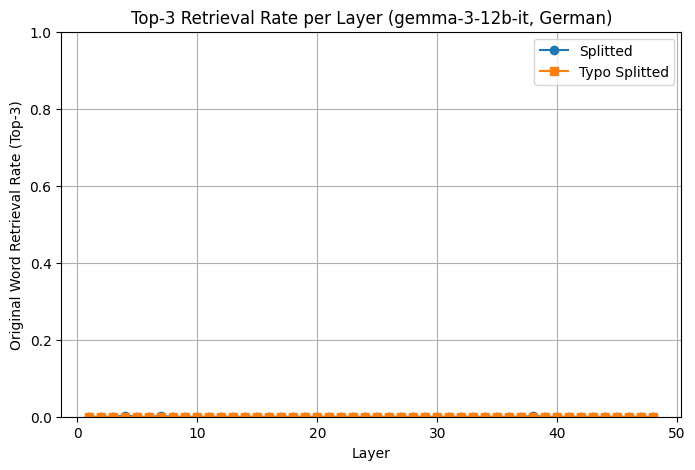

In [2]:
MODEL_NAME = "google/gemma-3-12b-it"
LANGUAGE = "German"
logit_lens = LogitLens(LANGUAGE, MODEL_NAME)
MODEL_NAME = MODEL_NAME.split("/")[-1]
layers_original, rates_original, layers_typo, rates_typo = logit_lens.run(
    path1 = f"/home/hyujang/multilingual-inner-lexicon/data/RQ1/WordIdentity/single_token_splitted_{MODEL_NAME}_{LANGUAGE}_v2.csv",
    path2 = f"/home/hyujang/multilingual-inner-lexicon/data/RQ1/WordIdentity/single_token_typos_{MODEL_NAME}_{LANGUAGE}_v2.csv",
    vis=True,
    save=True
)

Using device: cuda


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

Model meta-llama/Llama-2-7b-chat-hf for English loaded successfully.


100%|██████████| 700/700 [00:30<00:00, 22.88it/s]


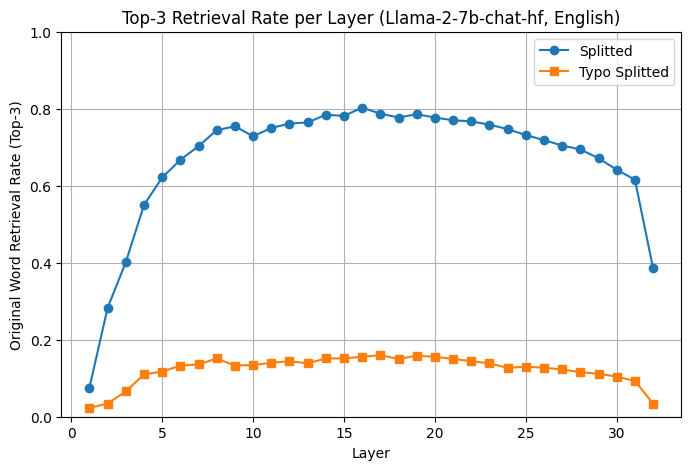

In [3]:
MODEL_NAME = "meta-llama/Llama-2-7b-chat-hf"
LANGUAGE = "English"
logit_lens = LogitLens(LANGUAGE, MODEL_NAME)
MODEL_NAME = MODEL_NAME.split("/")[-1]
layers_original, rates_original, layers_typo, rates_typo = logit_lens.run(
    path1 = f"/home/hyujang/multilingual-inner-lexicon/data/RQ1/WordIdentity/single_token_splitted_{MODEL_NAME}_{LANGUAGE}_v2.csv",
    path2 = f"/home/hyujang/multilingual-inner-lexicon/data/RQ1/WordIdentity/single_token_typos_{MODEL_NAME}_{LANGUAGE}_v2.csv",
    vis=True,
    save=True
)

Using device: cuda


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

Model meta-llama/Llama-2-7b-chat-hf for German loaded successfully.


100%|██████████| 700/700 [00:30<00:00, 23.14it/s]


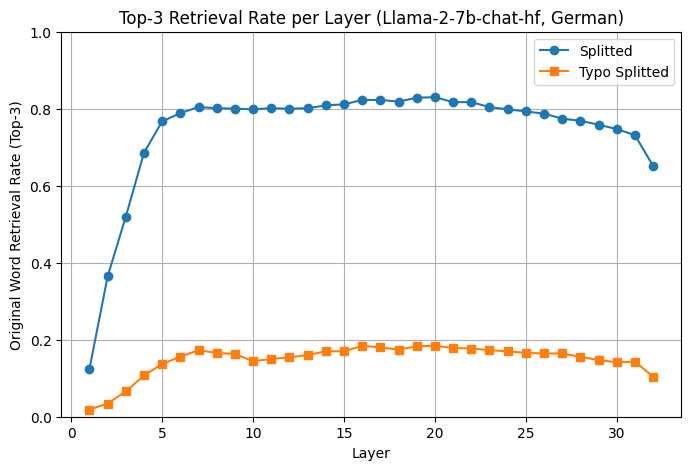

In [4]:
MODEL_NAME = "meta-llama/Llama-2-7b-chat-hf"
LANGUAGE = "German"
logit_lens = LogitLens(LANGUAGE, MODEL_NAME)
MODEL_NAME = MODEL_NAME.split("/")[-1]
layers_original, rates_original, layers_typo, rates_typo = logit_lens.run(
    path1 = f"/home/hyujang/multilingual-inner-lexicon/data/RQ1/WordIdentity/single_token_splitted_{MODEL_NAME}_{LANGUAGE}_v2.csv",
    path2 = f"/home/hyujang/multilingual-inner-lexicon/data/RQ1/WordIdentity/single_token_typos_{MODEL_NAME}_{LANGUAGE}_v2.csv",
    vis=True,
    save=True
)

In [6]:
import gc
import torch
torch.cuda.empty_cache()
gc.collect()

0

## REF PAPER CODE

In [4]:
from typing import Union
import copy
import torch.nn.functional as F
import abc
from abc import ABC, abstractmethod
from transformers import PreTrainedModel
from torch import nn
import torch

def get_embedding_matrix(model: nn.Module) -> nn.Embedding:
    """The initial embedding matrix from the input tokens to the model hidden state."""
    if isinstance(model, PreTrainedModel):
        embed = model.get_input_embeddings()
        if not isinstance(embed, nn.Embedding):
            raise ValueError("We currently only support embedding matrices")
        return embed
    else:
        raise ValueError(f"Model class {type(model)} not recognized!")


Model = Union[PreTrainedModel]

class Reembed(nn.Module):
    """Module that maps transformer hidden states to logits (and vice versa)."""
    embedding: torch.Tensor

    def __init__(
        self,
        model: Model,
        distance_metric: str = "logits",
    ):
        """Initialize unmebed.

        Args:
            model: A HuggingFace model from which to extract the unembedding matrix.
        """
        super().__init__()
        embedding_matrix = get_embedding_matrix(model)
        
        # self.embedding = copy.deepcopy(embedding_matrix.weight.data)
        self.embedding = embedding_matrix.weight

        self.distance_metric = distance_metric

        # In general we don't want to finetune the unembed operation.
        self.requires_grad_(False)

    def forward(self, hidden_state: torch.Tensor) -> torch.Tensor:
        """Convert hidden states into logits."""
        
        if self.distance_metric == 'logits':
            logits = torch.matmul(hidden_state, self.embedding.T).squeeze(0)

        elif self.distance_metric == 'cosine':
            # Normalize E and h
            E_normalized = F.normalize(self.embedding, p=2, dim=-1)
            h_normalized = F.normalize(hidden_state, p=2, dim=-1)

            # Compute cosine similarity
            logits = torch.matmul(h_normalized, E_normalized.T).squeeze(0)

        elif self.distance_metric == 'euclidean':
            # Compute Euclidean distance
            distances = torch.cdist(hidden_state, self.embedding, p=2).squeeze(0)

            # Convert distances to logits (negative distance for logits-like values)
            logits = -distances

        else:  # Compute regular dot-product as a similarity measure
            logits = torch.matmul(hidden_state, self.embedding.T).squeeze(0)
        return logits


class ReverseLens(abc.ABC, nn.Module):
    """Abstract base class for all Lens."""

    reembed: Reembed

    def __init__(self, reembed: Reembed):
        """Create a Lens.

        Args:
            unembed: The unembed operation to use.
        """
        super().__init__()

        self.reembed = reembed

    @abc.abstractmethod
    def forward(self, h: torch.Tensor, idx: int) -> torch.Tensor:
        """Decode hidden states into logits."""
        ...


class ReverseLogitLens(ReverseLens):
    """Reembeds the residual stream into logits."""

    reembed: Reembed

    def __init__(
        self,
        reembed: Reembed,
    ):
        """Create a Reverse Logit Lens.

        Args:
            reembed: The reembed operation to use.
        """
        super().__init__(reembed)

    @classmethod
    def from_model(
        cls,
        model: PreTrainedModel,
    ) -> "ReverseLogitLens":
        """Create a ReverseLogitLens from a pretrained model.

        Args:
            model: A pretrained model from the transformers library you wish to inspect.
        """
        reembed = Reembed(model)
        return cls(reembed)

    def forward(self, h: torch.Tensor, idx: int) -> torch.Tensor:
        """Decode a hidden state into logits.

        Args:
            h: The hidden state to decode.
            idx: the layer of the transformer these hidden states come from.
        """
        del idx
        return self.reembed.forward(h)

class WordRetrieverBase(ABC):
    def __init__(self, model, tokenizer):
        self.model = model
        self.tokenizer = tokenizer

    @abstractmethod
    def retrieve_word(self, hidden_states, layer_idx=None, num_tokens_to_generate=3):
        pass

class ReverseLogitLensRetriever(WordRetrieverBase):
    def __init__(self, model, tokenizer, device='cuda', dtype=torch.float16):
        super().__init__(model, tokenizer)
        # self.reverse_logit_lens = ReverseLogitLens.from_model(model).to(device).to(dtype)
        self.reverse_logit_lens = ReverseLogitLens.from_model(model).to(device)

    def retrieve_word(self, hidden_states, layer_idx=None, num_tokens_to_generate=3):
        result = self.reverse_logit_lens(hidden_states, layer_idx)
        print(f"Result: {torch.argmax(result, dim=-1)}")
        token = self.tokenizer.decode(torch.argmax(result, dim=-1).item())
        return token


In [ ]:
import torch
from transformers import Gemma3ForConditionalGeneration, AutoTokenizer

tokenizer_name = "google/gemma-3-12b-it"
token_value = "HF_TOKEN_REMOVED"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = Gemma3ForConditionalGeneration.from_pretrained(tokenizer_name, token=token_value)
tokenizer = AutoTokenizer.from_pretrained(tokenizer_name, token=token_value, use_fast=True)
model.to(device)


retriever = ReverseLogitLensRetriever(model, tokenizer)

context = "benefitial"
max_length = 100
tokenized_combined_text = tokenizer(context, return_tensors='pt', truncation=True, max_length=max_length).to(device) # 2tokens
word_tokens = tokenized_combined_text['input_ids'][0]
print(word_tokens)
outputs = model(**tokenized_combined_text, output_hidden_states=True)
hidden_states = outputs.hidden_states
# len(hidden_states) # 49 (# of layers)
# hidden_states[0].shape # torch.Size([1, 2, 3840])
for layer_idx, hidden_state in enumerate(hidden_states):
    postfix_hidden_state = hidden_states[layer_idx][0, -1, :].unsqueeze(0) # torch.Size([1, 3840]) # take the last token's hidden state
    retrieved_word_str = retriever.retrieve_word(postfix_hidden_state, layer_idx=layer_idx, num_tokens_to_generate=len(word_tokens))
    print(layer_idx)
    print(retrieved_word_str)